In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


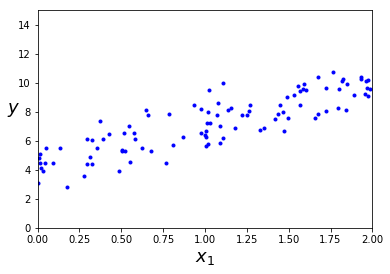

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear regression
$$\hat{y} = w\cdot x + b$$
$$L(w,b) = \sum_{i=1}^{n}\left(y^{(i)}-(w\cdot x^{(i)}+b)\right)^2$$
$b$ can be assimilated into $w$ by adding a new feature (1):
$$\bar{x}=(1,x) \in \mathbb{R}^{d+1}$$

$$\tilde{w} = (b,w)$$
$$w\cdot x + b = \tilde{w}\cdot \tilde{x} = (1,x)\cdot (b,w)$$
$$\tilde{w} = (X^{T}X)^{-1}(X^{T}y) $$

In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
w

array([[4.33293103],
       [2.79255669]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.33293103],
       [9.91804441]])

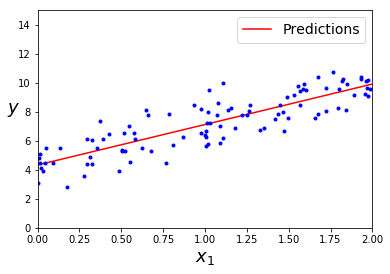

In [18]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.33293103]), array([[2.79255669]]))

# Mini-batch gradient descent 

In general, for a decomposable loss function
$$L(w) = \sum_{i=1}^{n} l(w, x^{(i)}, y^{(i)})$$

The algorithm is essentially:
1. $w_{0}=0$
2. Repeat:
    * get the next batch of points B
    * $w_{t+1} = w_{t} - \eta_{t}\sum_{x,y \in B} \nabla l(w_{t}, x, y)$

Source: [UC San Diego Machine Learning Fundamentals course at edx](https://www.edx.org/course/machine-learning-fundamentals-uc-san-diegox-dse220x)

Source Image: [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)

![Gradient descent, source Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/1280px-Gradient_descent.svg.png)


In [22]:
theta_path_mgd = []

m = len(X_b)
np.random.seed(42)

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.35287772],
       [2.81039485]])

# Polynomial Regression


In [84]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [85]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

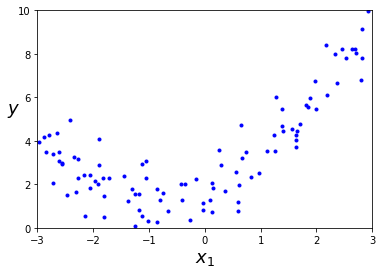

In [86]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

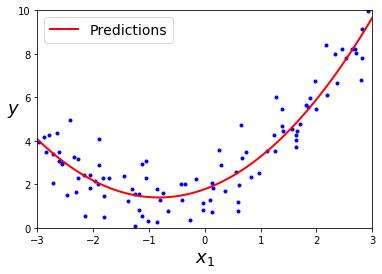

In [89]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Overfitting and Underfitting 

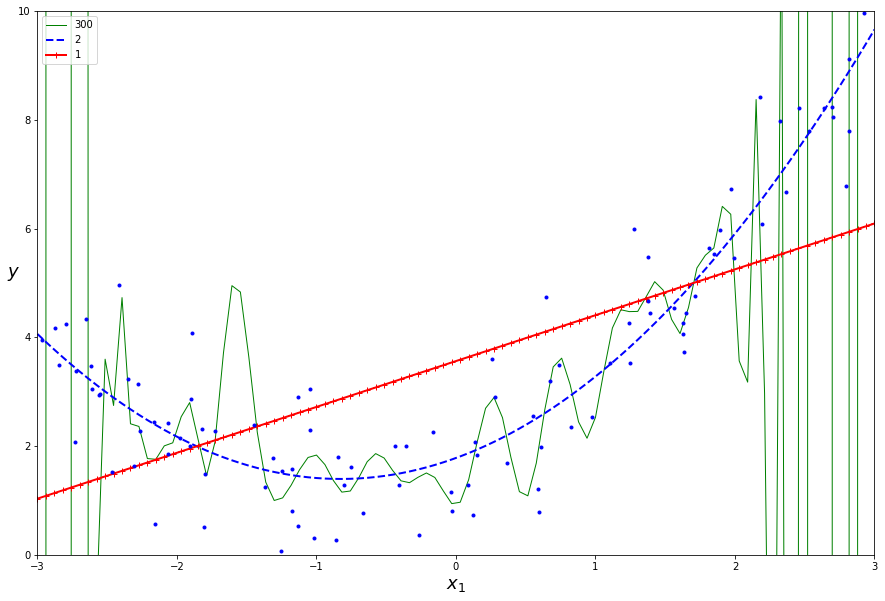

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


plt.figure(figsize=(15,10))

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np


def f(degree):
    
    plt.figure(figsize=(10,8))
    plt.plot(X, y, "b.", linewidth=3)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.axis([-3, 3, 0, 10])
    plt.plot(X_new, y_newbig, 'g-', label=str(opts.degree), linewidth=2)
    
interactive_plot = interactive(f, degree=([1,2,3,4,5,10,50,300]))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot




interactive(children=(Dropdown(description='degree', options=(1, 2, 3, 4, 5, 10, 50, 300), value=1), Output(la…

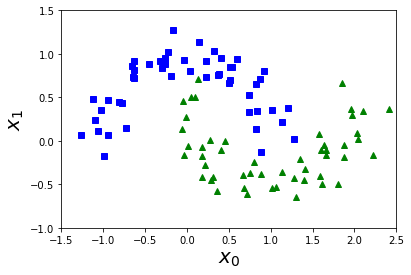

In [38]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.xlabel(r"$x_{0}$", fontsize=20)
    plt.ylabel(r"$x_{1}$", fontsize=20)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [45]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

svc_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=10000))
    ])

In [46]:
svc_pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [47]:
def plot_prediction(clf, axes):
    x_0 = np.linspace(axes[0], axes[1], 100)
    x_1 = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x_0, x_1)
    X =  np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_predict, alpha=0.2, cmap=plt.cm.brg)
    plt.contourf(x0, x1, y_decision, alpha=0.1, cmap=plt.cm.brg)  

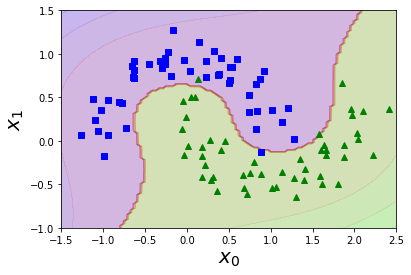

In [50]:
axis=[-1.5, 2.5, -1, 1.5]
plot_prediction(svc_pipeline, axis)
plot_dataset(X, y, axis)

# Vahid


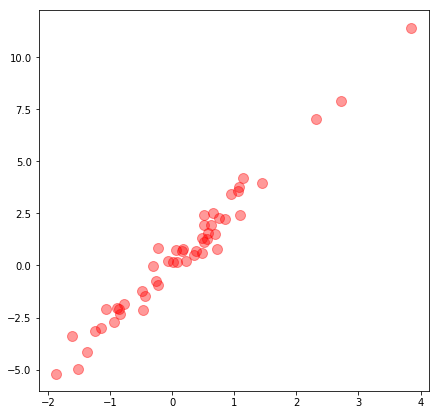

In [51]:
N = 50
x1= np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]

y = 3*x1 + np.random.normal(loc=.0, scale=.7, size=N)[:,np.newaxis]
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(x1,y,'or',markersize=10,alpha=.4 );

In [68]:

def linear_regressor(a,b):
    # y_ = ax+b
    mn = np.min(x1)
    mx = np.max(x1)
    xrng =  np.linspace(mn,mx,num=500)
    y_ = [a*x + b for x in xrng]
    
    
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    plt.plot(x1,y,'or',markersize=10,alpha=.4 );
    plt.xlabel('x1');
    plt.ylabel('y');
    plt.plot(xrng,y_,'-b',linewidth=1)
    
    yy = [a*x + b for x in x1]
    
    [plt.plot([x1[i],x1[i]],[yy[i],y[i]],'-r',linewidth=1) for i in range(len(x1))];
    print ('average squared error is {}'.format(np.mean((yy-y)**2)))

average squared error is 0.30257775971288614


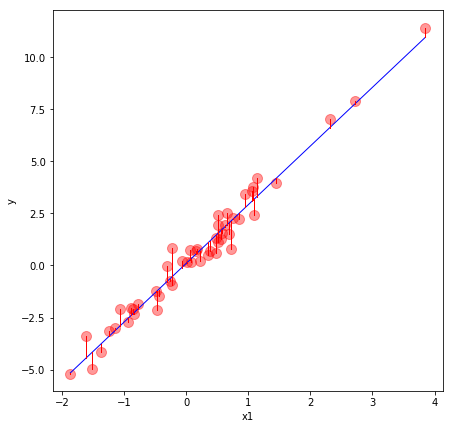

In [69]:

linear_regressor(amn,bmn)